# Homework 8:  Resampling methods

This homework assignment is designed to give you practice with bootstrapping and permutation tests.

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 

This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

---
## 1. Loading & Visualizing the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file. 

(a) Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`, self reported at time of data collection), Flanker Task performance (`Flanker_Unadj`), total intracranial volume (`FS_IntraCranial_Vol`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame. 

In [43]:
library(tidyverse)
library(here)
library(skimr)
library(janitor)
library(psych)
library(reshape2)
library(dplyr)

In [45]:
setwd("~/Documents/GitHub/Luetkehans_DSPN_S22/data")

data1 <- read.csv('unrestricted_trimmed_1_7_2020_10_50_44 copy.csv')
head(data1)

,Subject,Release,Acquisition,Gender,Age,MMSE_Score,PSQI_Score,PSQI_Comp1,PSQI_Comp2,PSQI_Comp3,⋯,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,100004,S900,Q06,M,22-25,29,8,1,2,2,⋯,5.2,101.12,86.45,2,45.9,107.17,105.31,1.80,0,1.80
2,100206,S900,Q11,M,26-30,30,6,1,1,1,⋯,6.0,108.79,97.19,1,49.7,72.63,72.03,1.84,0,1.84
3,100307,Q1,Q01,F,26-30,29,4,1,0,1,⋯,3.6,101.12,86.45,0,38.6,71.69,71.76,1.76,0,1.76
4,100408,Q3,Q03,M,31-35,30,4,1,1,0,⋯,2.0,108.79,98.04,2,52.6,114.01,113.59,1.76,2,1.68
5,100610,S900,Q08,M,26-30,30,4,1,1,0,⋯,2.0,122.25,110.45,0,38.6,84.84,85.31,1.92,1,1.88
6,101006,S500,Q06,F,31-35,28,2,1,1,0,⋯,6.0,122.25,111.41,0,38.6,123.80,123.31,1.80,0,1.80


In [46]:
d1 <- data1 %>%
subset(select = c(Subject, Gender, Flanker_Unadj, FS_IntraCranial_Vol, FS_Tot_WM_Vol, FS_Total_GM_Vol)) %>%
na.omit()

head(d1)

,Subject,Gender,Flanker_Unadj,FS_IntraCranial_Vol,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<fct>,<dbl>,<dbl>,<int>,<int>
2,100206,M,130.42,1864518,543134,807245
3,100307,F,112.56,1512540,407292,664124
4,100408,M,121.18,1684117,500417,726206
5,100610,M,126.53,1816044,512946,762308
6,101006,F,101.85,1437868,429449,579632
7,101107,M,107.04,1512727,416995,665024


(b) Plot grey matter volume (x axis) against intracranial volume (y axis) and Gender (point color). 

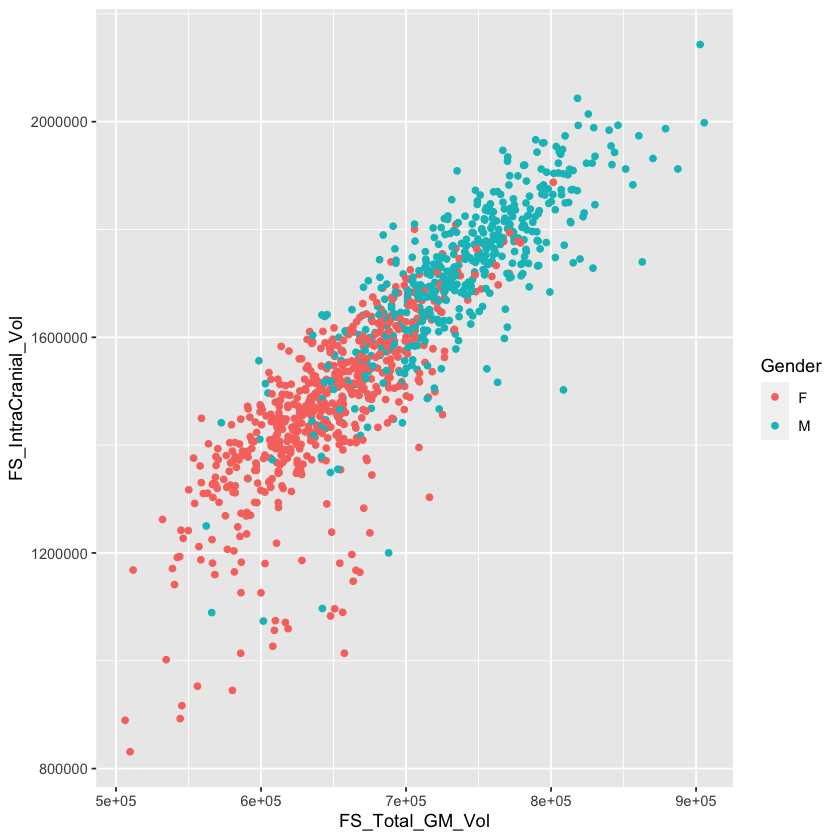

In [47]:
plot1 <- ggplot(data = d1, aes(x= FS_Total_GM_Vol, y= FS_IntraCranial_Vol, color = Gender)) +
geom_point()

plot1



What patterns do you observe in the scatter plot?

> Intracranial Volume appears to be positively correlated with total grey matter volume.  Aside from some participants on the far ends of their respective distributions, male participants appear to have a generally higher intracranial volume and grey matter volume than female participants.  There are outliers in both groups on both sides of the spectrum.

---
## 2. Logistic classifier (2 points)

We want to try predicting gender using the neural data you have loaded.

(a) Run a logisic regression model to predict gender from total white matter volume, total grey matter volume, and intracranial volume. 

In [48]:
gendermodel <- glm(Gender ~ FS_IntraCranial_Vol + FS_Tot_WM_Vol + FS_Total_GM_Vol, data = d1, family = binomial)
summary(gendermodel)


Call:
glm(formula = Gender ~ FS_IntraCranial_Vol + FS_Tot_WM_Vol + 
    FS_Total_GM_Vol, family = binomial, data = d1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7695  -0.6173  -0.1863   0.5997   3.2309  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -2.262e+01  1.347e+00 -16.787  < 2e-16 ***
FS_IntraCranial_Vol  5.020e-06  1.177e-06   4.263 2.01e-05 ***
FS_Tot_WM_Vol        2.140e-06  3.059e-06   0.699    0.484    
FS_Total_GM_Vol      1.959e-05  3.145e-06   6.229 4.70e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1534.13  on 1112  degrees of freedom
Residual deviance:  919.85  on 1109  degrees of freedom
AIC: 927.85

Number of Fisher Scoring iterations: 5


Which factors are signficantly associated with gender?

> Intracranial volume and grey matter volume are significantly associated with gender.

(b) Estimate the prediction accuracy of your model (Note: this is the training set accuracy). Set your prediction threshold to 0.5.

In [57]:
#Using the prediction accuracy strategy from the class notebook

gender_prediction_prob <- data.frame(predict(gendermodel, type = 'response'))
colnames(gender_prediction_prob) <- c('predictedprobability')
n_rows <- nrow(gender_prediction_prob)

threshold = 0.50

gender_prediction_prob$predicted_gender = rep('F', n_rows)

gender_prediction_prob$predicted_gender[gender_prediction_prob$predictedprobability > threshold] = 'M'

head(gender_prediction_prob)

confusion_matrix <- data.frame(gender_prediction_prob$predicted_gender, d1$Gender)

colnames(confusion_matrix) <- c('predicted', 'actual') 

table(confusion_matrix)

print(paste("Accuracy:",mean(confusion_matrix$predicted == confusion_matrix$actual)))


,predictedprobability,predicted_gender
,<dbl>,<chr>
2,0.97633865,M
3,0.24207122,F
4,0.75683279,M
5,0.92633475,M
6,0.04212663,F
7,0.24936028,F


         actual
predicted   F   M
        F 516 110
        M  90 397

[1] "Accuracy: 0.820305480682839"


What is the prediction accuracy for gender from the full model?

> The prediction accuracy for gender from the full model is about 82%.

---
## 3. Bootstrapped accuracy (3 points)

Use bootstrapping to estimate the confidence intervals of the _prediction accuracy_ of your model. Plot the histogram of the bootstrapped prediction accuracies and estimate the confidence intervals off of the standard deviation from the bootstrap.


In [58]:
library(boot)

In [73]:
nrow(d1)

boot.fn <- function(data, index) {
    prediction_prob <- data.frame(predict(glm(Gender ~ FS_IntraCranial_Vol + FS_Tot_WM_Vol + FS_Total_GM_Vol, 
                                              data = data, subset = index, family = binomial), type = 'response'))
    
    colnames(prediction_prob) <- c('predictedprobability')
    
    nrows <- nrow(prediction_prob)

    threshold_fn = 0.50

    prediction_prob$predicted_gender = rep('F', nrows)

    prediction_prob$predicted_gender[prediction_prob$predictedprobability > threshold_fn] = 'M'

    #head(prediction_prob)

    confusion_matrix_fn <- data.frame(prediction_prob$predicted_gender, data$Gender[index])

    colnames(confusion_matrix_fn) <- c('predicted', 'actual') 

    return(mean(confusion_matrix_fn$predicted == confusion_matrix_fn$actual))
}

print(boot.fn(d1, 1:nrow(d1)))

[1] 1113

[1] 0.8203055


In [80]:
#Running 1000 repetitions
accuracyboot <- boot(d1, boot.fn, R=1000)
print(accuracyboot)



ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = d1, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
     original        bias    std. error
t1* 0.8203055 -0.0006082659  0.01182097



ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = d1, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
     original        bias    std. error
t1* 0.8203055 -0.0006082659  0.01182097

In [81]:
attributes(accuracyboot)


$names
 [1] "t0"        "t"         "R"         "data"      "seed"      "statistic"
 [7] "sim"       "call"      "stype"     "strata"    "weights"  

$class
[1] "boot"

$boot_type
[1] "boot"

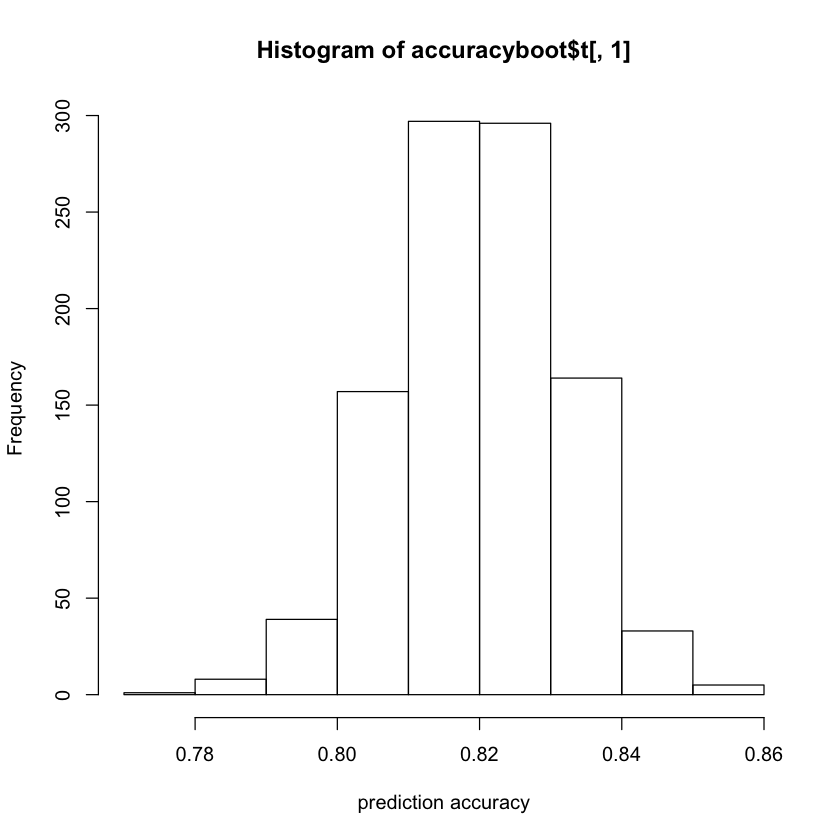

In [82]:
hist(accuracyboot$t[,1], xlab="prediction accuracy")

In [132]:
error <- qnorm(0.975)*0.01182097
lower = mean(accuracyboot$t[,1]) - error
upper = mean(accuracyboot$t[,1]) + error
print(paste('95% confidence interval:', '[',lower,',',upper,']'))

[1] "95% confidence interval: [ 0.796528539272622 , 0.842865890197279 ]"


How robust is the prediction accuracy of the full model?

> Because the bootstrapped estimate of prediction accuracy converges to a similar mean value as the prediction accuracy of the full model, we can say that the prediction accuracy of the full model is fairly robust.  Additionally, the original estimate is within the confidence interval of the bootstrapped prediction accuracy, meaning the prediction accuracy of the full model is robust.

---
## 4. Permutation test for grey matter effects (3 points)

Now run a permutation test, with 1000 iterations, to evaluate how much grey matter volume contributes to the prediction accuracy. Compare the prediction accuracy of the full (unpermuted model) with the distribution of accuracies you get with a randomized grey matter volume term using a histogram (Hint: use the `abline` function to show the original accuracy on the histogram).

In [114]:
permd1 <- d1

R = 1000

perm.accuracies=matrix(NA,nrow=R, ncol=2)
perm.accuracies_real = matrix(NA, nrow=R, ncol=2)

head(perm.accuracies)

for (i in 1:R){
    permd1$FS_Total_GM_Vol=d1$FS_Total_GM_Vol[sample(nrow(d1))]
    perm.accuracies[i,]=boot.fn(permd1, 1:nrow(d1))
}

for (i in 1:R){
    perm.accuracies_real[i,] = boot.fn(d1, 1:nrow(d1))
    }

head(perm.accuracies)
head(perm.accuracies_real)

NA,NA
NA,NA
NA,NA
NA,NA
NA,NA
NA,NA


0.8050314,0.8050314
0.8059299,0.8059299
0.8086253,0.8086253
0.8050314,0.8050314
0.7996406,0.7996406
0.8050314,0.8050314


0.8203055,0.8203055
0.8203055,0.8203055
0.8203055,0.8203055
0.8203055,0.8203055
0.8203055,0.8203055
0.8203055,0.8203055


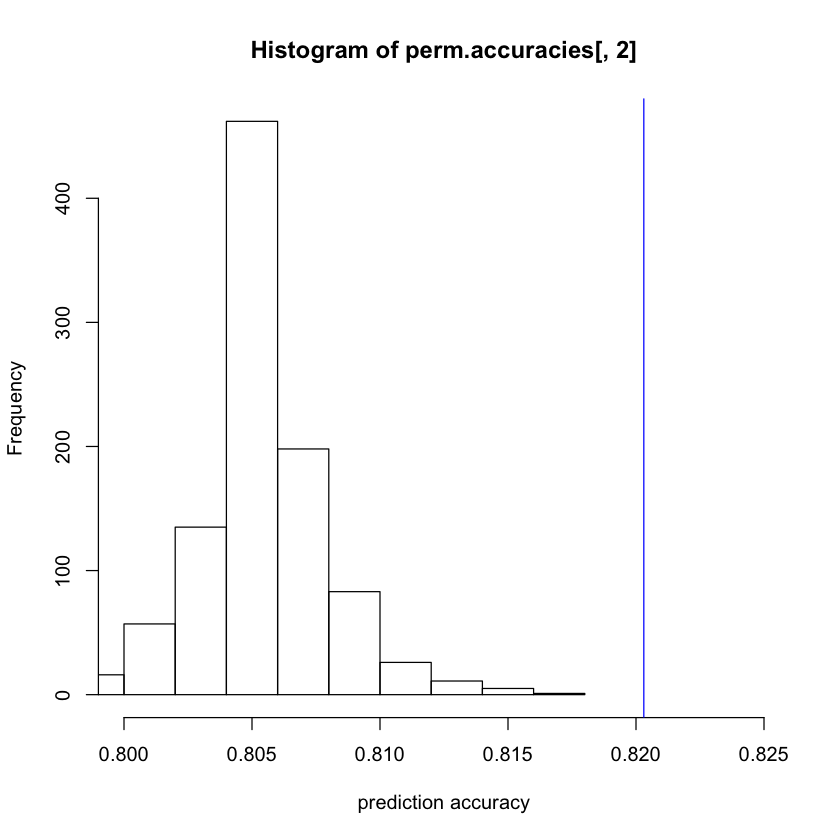

In [112]:
hist(perm.accuracies[,2], xlab="prediction accuracy", xlim = c(0.800, 0.825))
abline(v=boot.fn(d1, 1:nrow(d1)), col='blue')

In [118]:
perm.p = sum(perm.accuracies[,2]>=perm.accuracies_real[,2])/R 
perm.p

[1] 0

How much does the grey matter volume influence the prediction accuracy of the model?

> The probability that we see a prediction accuracy generated from the permutation test that is the same size as the true prediction accuracy (or larger) is 0, meaning that grey matter volume DOES influence the prediction accuracy of the model with some significance.  Because a scrambled grey matter volume cannot generate the same prediction accuracy as the true model, we can infer that grey matter volume influences the prediction accuracy.  We can also assume that grey matter volume influences the prediction accuracy of the model with the beta generated from our original model, or an effect size of beta(grey matter volume) =   1.959e-05

---
## 5. Reflection (1 point)

Differentiate the bootstrap from a permutation test. Describe each and when is it appropriate to each.

> Bootstrapping tells us what the possible distribution of our effect size (or in this case, prediction accuracy) is when our data is resampled with replacement, and should be used when your goal is to determine whether your estimated effect size would be found with some other possible distribution of your data.

>Permutation testing tells us whether the effect, or the relationship between X and Y (in this case, grey matter volume and prediction accuracy) would still be present when X and Y is scrambled.  This test should be used when your goal is to determine whether X actually influences your effect size with some significance.  

**DUE:** 5pm EST, April 1, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*